# Datenvorbereitung für die Schlafqualität-Analyse

In diesem Notebook bereiten wir den umfassenden Datensatz zu Schlaf- und Gesundheitsmetriken vor, um diesen für maschinelle Lernmodelle nutzbar zu machen. Wir werden die Daten bereinigen, analysieren, normalisieren und neue Merkmale hinzufügen, um optimale Ergebnisse zu erzielen.



In [1]:
# Importiere die notwendigen Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [3]:
# Lade den Datensatz
file_path = "/Users/tommygrace/Desktop/sleep_quality_project/data/wearable_tech_sleep_quality_1.csv"  # Der Pfad zu deiner Datei
df = pd.read_csv(file_path)

# Zeige die ersten 5 Zeilen des Datensatzes
df.head()


,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,79.934283,37.199678,1.324822,4.638289,1.0,107.624032,2.771837,0.657037,7.933949
1,67.234714,36.962317,1.855481,6.209422,1.0,104.658589,3.738138,0.144464,6.992699
2,82.953771,36.529815,1.207580,6.879592,10.0,0.000000,3.115880,0.642949,7.655250
3,100.460597,36.176532,1.692038,10.331531,1.0,116.990981,3.904008,0.453255,9.429463
4,65.316933,36.849112,0.106385,8.334830,1.0,223.282908,4.571699,0.641492,10.555713


In [4]:
# Allgemeine Informationen zu den Daten
df.info()

# Statistische Zusammenfassung der numerischen Spalten
df.describe()

# Überprüfen auf fehlende Werte
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Heart_Rate_Variability  1000 non-null   float64
 1   Body_Temperature        1000 non-null   float64
 2   Movement_During_Sleep   1000 non-null   float64
 3   Sleep_Duration_Hours    1000 non-null   float64
 4   Sleep_Quality_Score     1000 non-null   float64
 5   Caffeine_Intake_mg      1000 non-null   float64
 6   Stress_Level            1000 non-null   float64
 7   Bedtime_Consistency     1000 non-null   float64
 8   Light_Exposure_hours    1000 non-null   float64
dtypes: float64(9)
memory usage: 70.4 KB


Heart_Rate_Variability    0
Body_Temperature          0
Movement_During_Sleep     0
Sleep_Duration_Hours      0
Sleep_Quality_Score       0
Caffeine_Intake_mg        0
Stress_Level              0
Bedtime_Consistency       0
Light_Exposure_hours      0
dtype: int64

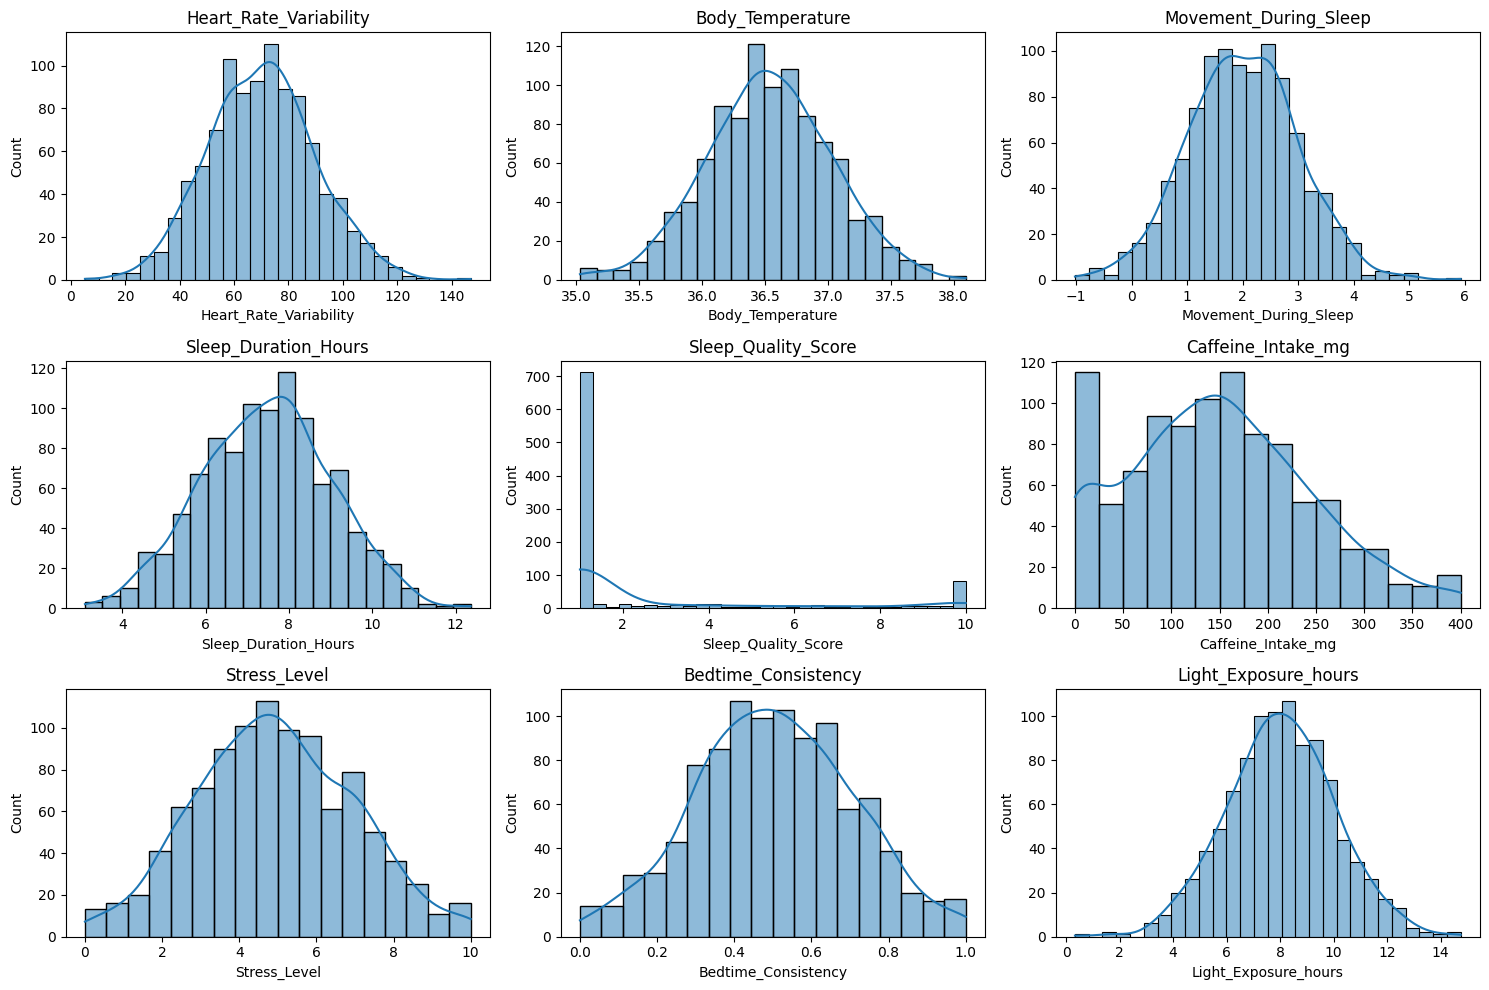

In [5]:
# Verteilung der Merkmale visualisieren
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


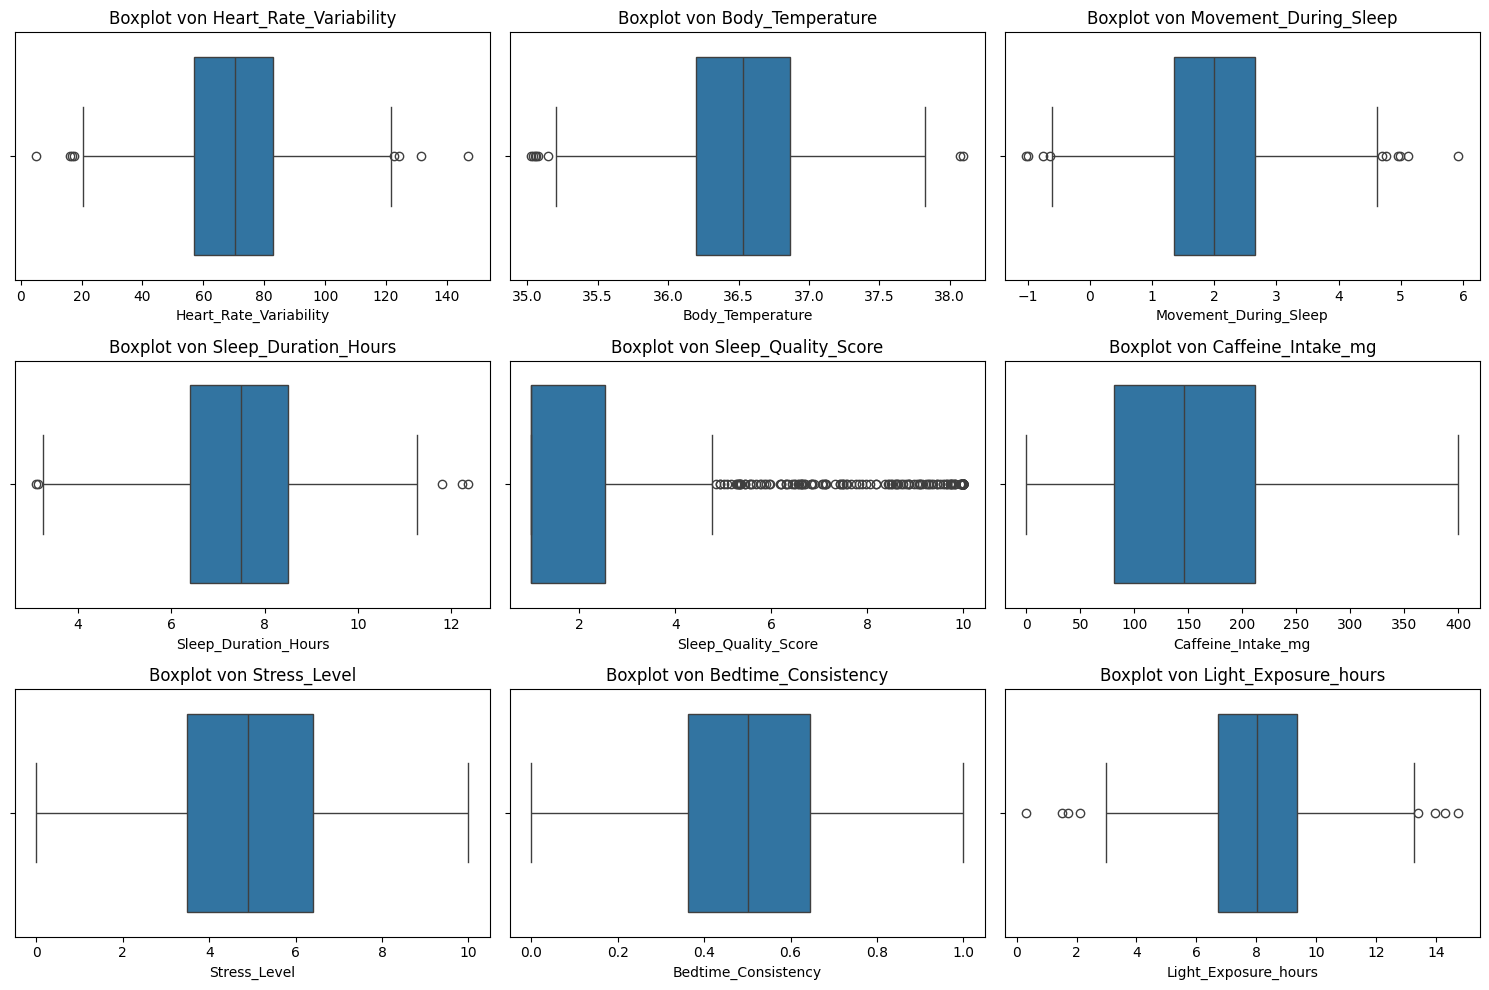

In [6]:
# Überprüfen auf Outlier mit Boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot von {column}')
plt.tight_layout()
plt.show()


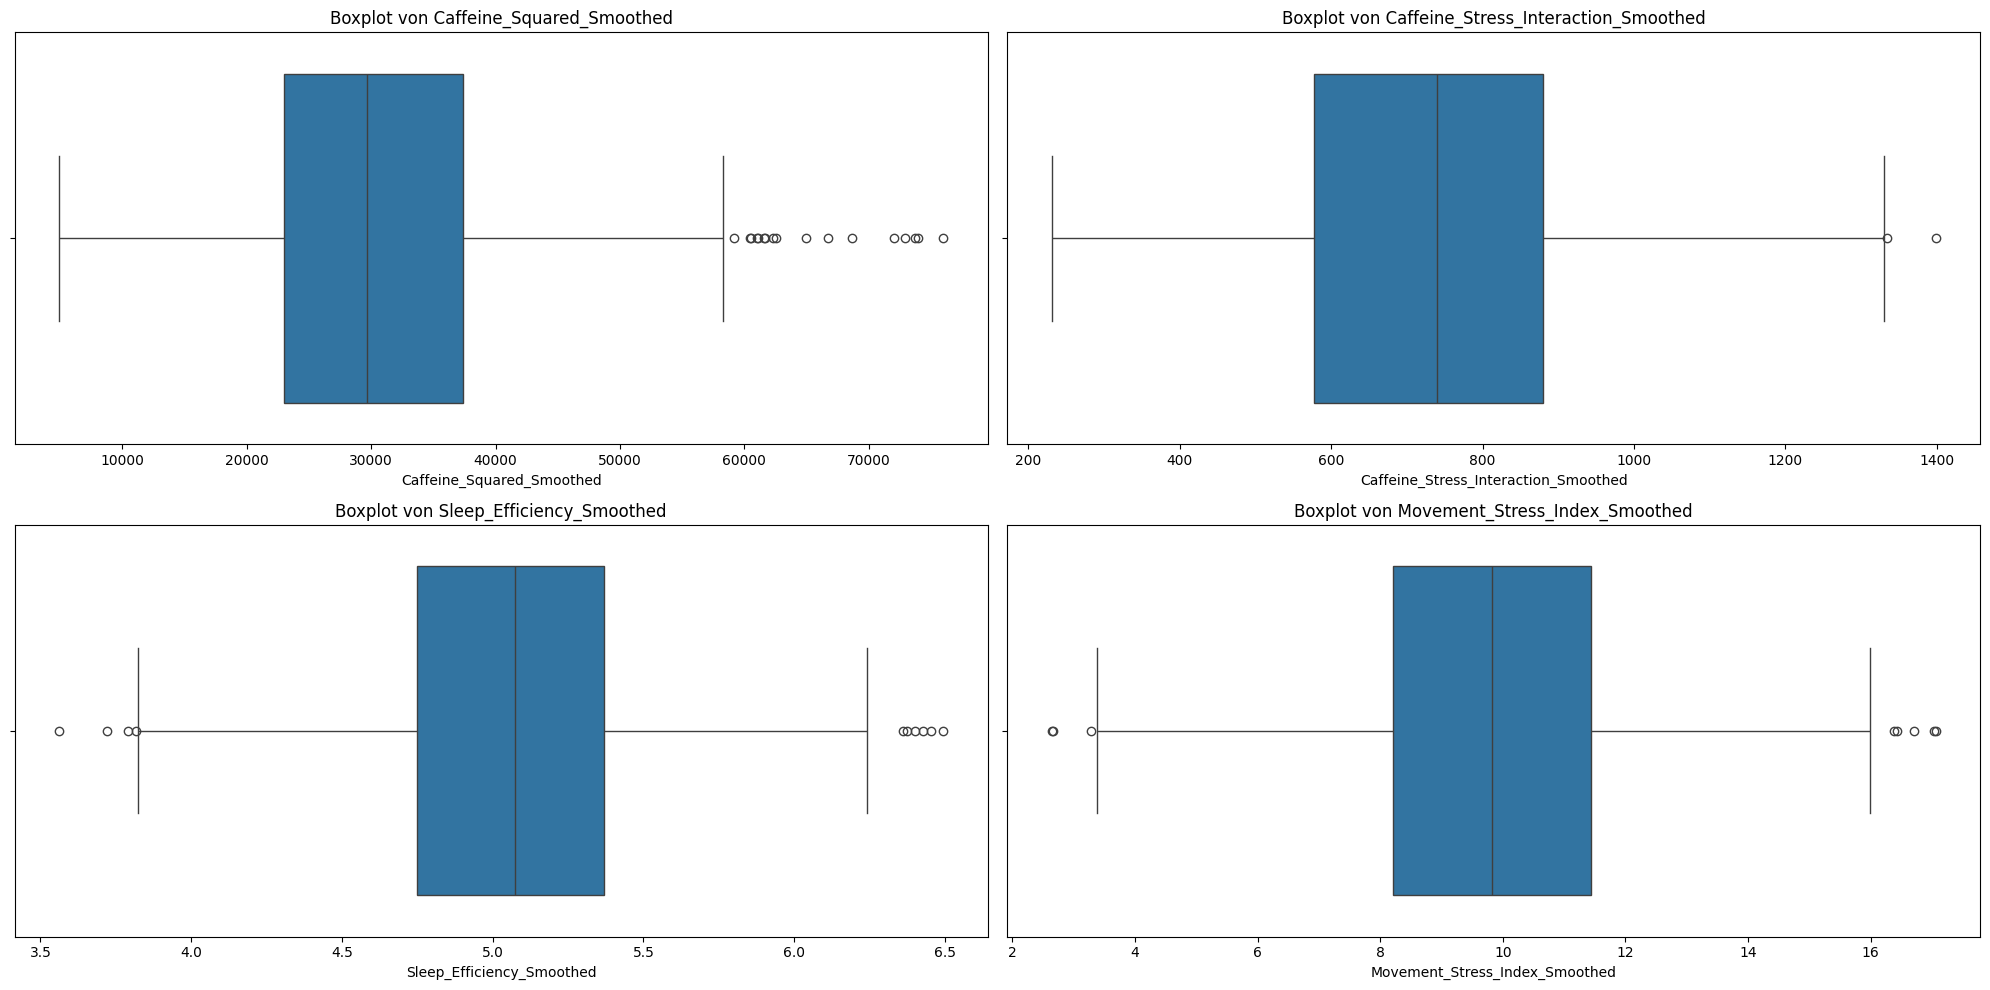

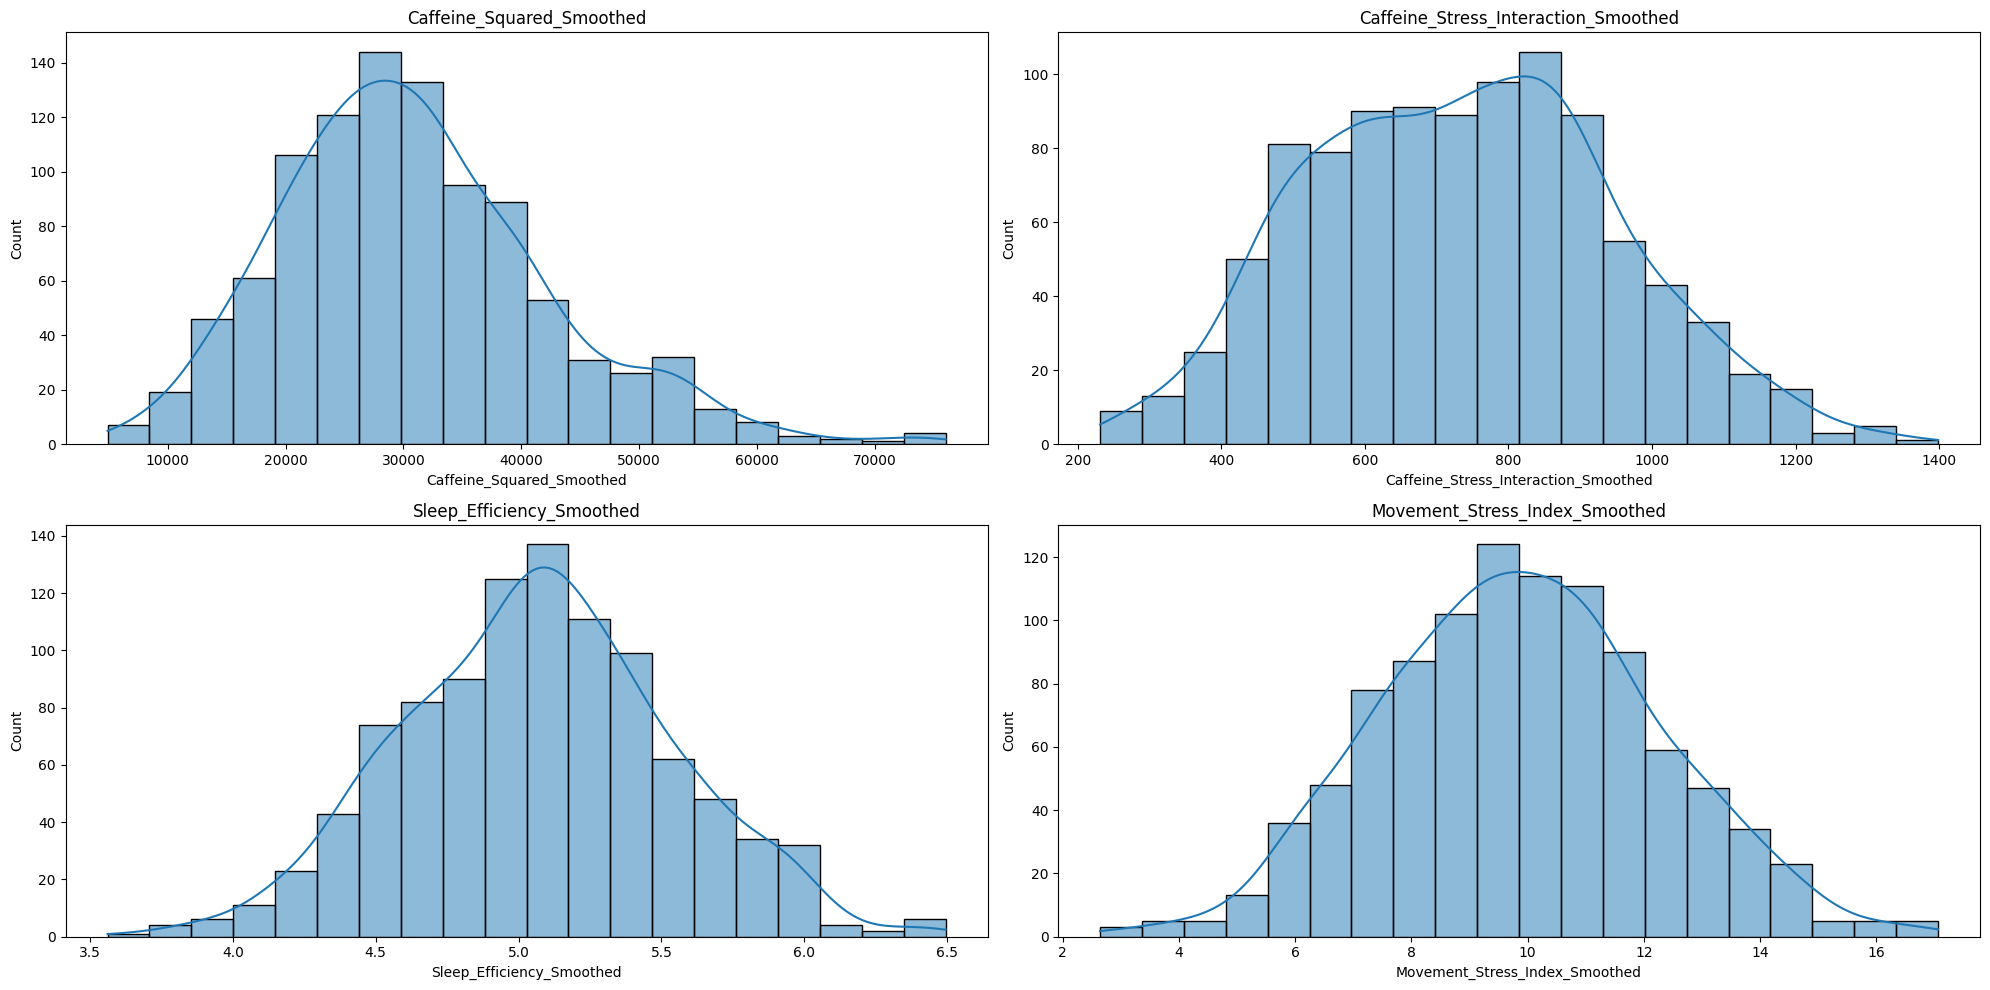

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Laden des ursprünglichen Datensatzes
df = pd.read_csv('../data/wearable_tech_sleep_quality_1.csv')

# Erstellen der neuen Features
# 1. Caffeine_Squared: Das Quadrat der Koffeinaufnahme, um mögliche nichtlineare Effekte zu erfassen
df['Caffeine_Squared'] = df['Caffeine_Intake_mg'] ** 2

# 2. Caffeine_Stress_Interaction: Interaktion zwischen Koffein und Stresslevel, um kombinierte Effekte zu untersuchen
df['Caffeine_Stress_Interaction'] = df['Caffeine_Intake_mg'] * df['Stress_Level']

# 3. Sleep_Efficiency: Verhältnis von Schlafdauer zur Konsistenz der Schlafenszeit als Indikator für die Schlafqualität
df['Sleep_Efficiency'] = df['Sleep_Duration_Hours'] / (1 + df['Bedtime_Consistency'])

# 4. Movement_Stress_Index: Kombination aus Bewegung im Schlaf und Stresslevel, um die Auswirkungen von Stress auf die Schlafbewegung zu messen
df['Movement_Stress_Index'] = df['Movement_During_Sleep'] * df['Stress_Level']

# Definiere das Fenster für die Glättung
window_size = 7

# Glätten der neuen Features
df['Caffeine_Squared_Smoothed'] = df['Caffeine_Squared'].rolling(window=window_size).mean()
df['Caffeine_Stress_Interaction_Smoothed'] = df['Caffeine_Stress_Interaction'].rolling(window=window_size).mean()
df['Sleep_Efficiency_Smoothed'] = df['Sleep_Efficiency'].rolling(window=window_size).mean()
df['Movement_Stress_Index_Smoothed'] = df['Movement_Stress_Index'].rolling(window=window_size).mean()

# Speichern des geglätteten Datensatzes
smoothed_features = df[['Heart_Rate_Variability', 'Body_Temperature', 'Movement_During_Sleep',
                        'Sleep_Duration_Hours', 'Sleep_Quality_Score', 'Caffeine_Intake_mg',
                        'Stress_Level', 'Bedtime_Consistency', 'Light_Exposure_hours',
                        'Caffeine_Squared_Smoothed', 'Caffeine_Stress_Interaction_Smoothed',
                        'Sleep_Efficiency_Smoothed', 'Movement_Stress_Index_Smoothed']]

# Speichern des geglätteten Datensatzes in einer neuen CSV-Datei
smoothed_features.to_csv('smoothed_dataset_with_new_features.csv', index=False)

# Visualisierung der neuen geglätteten Features
new_columns = [
    'Caffeine_Squared_Smoothed', 'Caffeine_Stress_Interaction_Smoothed',
    'Sleep_Efficiency_Smoothed', 'Movement_Stress_Index_Smoothed'
]

# Boxplots für die geglätteten neuen Features
plt.figure(figsize=(20, 10))
for i, col in enumerate(new_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=smoothed_features, x=col)
    plt.title(f'Boxplot von {col}')
plt.tight_layout()
plt.show()

# Histogramme für die geglätteten neuen Features
plt.figure(figsize=(20, 10))
for i, col in enumerate(new_columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(smoothed_features[col], kde=True, bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()


Sleep score analysis









 

In [15]:
import pandas as pd

# Daten laden
df_old = pd.read_csv('../data/wearable_tech_sleep_quality_1.csv')
df_new = pd.read_csv('smoothed_dataset_with_new_features.csv')

# Vorhandene Spalten anzeigen, um sicherzustellen, dass wir die richtige Spalte verwenden
print("Spalten im alten Datensatz:", df_old.columns)
print("Spalten im neuen Datensatz:", df_new.columns)

# Schlafqualitätsgruppen definieren
def categorize_sleep_quality(score):
    if score >= 7:
        return 'guter Schlaf'
    elif 4 <= score < 7:
        return 'entspannter Schlaf'
    else:
        return 'schlechter Schlaf'

# Kategorie-Spalte zu beiden Datensätzen hinzufügen
# Annahme: Die Spalte heißt in beiden Datensätzen 'Sleep_Quality_Score'
df_old['Sleep_Category'] = df_old['Sleep_Quality_Score'].apply(categorize_sleep_quality)
df_new['Sleep_Category'] = df_new['Sleep_Quality_Score'].apply(categorize_sleep_quality)

# Gruppen anzeigen
print(df_old[['Sleep_Quality_Score', 'Sleep_Category']].head())
print(df_new[['Sleep_Quality_Score', 'Sleep_Category']].head())


Spalten im alten Datensatz: Index(['Heart_Rate_Variability', 'Body_Temperature', 'Movement_During_Sleep',
       'Sleep_Duration_Hours', 'Sleep_Quality_Score', 'Caffeine_Intake_mg',
       'Stress_Level', 'Bedtime_Consistency', 'Light_Exposure_hours'],
      dtype='object')
Spalten im neuen Datensatz: Index(['Heart_Rate_Variability', 'Body_Temperature', 'Movement_During_Sleep',
       'Sleep_Duration_Hours', 'Sleep_Quality_Score', 'Caffeine_Intake_mg',
       'Stress_Level', 'Bedtime_Consistency', 'Light_Exposure_hours',
       'Caffeine_Squared_Smoothed', 'Caffeine_Stress_Interaction_Smoothed',
       'Sleep_Efficiency_Smoothed', 'Movement_Stress_Index_Smoothed'],
      dtype='object')
   Sleep_Quality_Score     Sleep_Category
0                  1.0  schlechter Schlaf
1                  1.0  schlechter Schlaf
2                 10.0       guter Schlaf
3                  1.0  schlechter Schlaf
4                  1.0  schlechter Schlaf
   Sleep_Quality_Score     Sleep_Category
0         

In [18]:
import pandas as pd

# Bestehenden Datensatz laden
df_new = pd.read_csv('smoothed_dataset_with_new_features.csv')

# Neues Feature: Verhältnis zwischen Lichtexposition und Schlafdauer
df_new['Light_Sleep_Ratio'] = df_new['Light_Exposure_hours'] / (df_new['Sleep_Duration_Hours'] + 1e-5)  # 1e-5, um Division durch 0 zu vermeiden

# Funktion zur Kategorisierung des Schlafscores
def categorize_sleep_quality(score):
    if score >= 7:
        return 'guter Schlaf'
    elif 4 <= score < 7:
        return 'entspannter Schlaf'
    else:
        return 'schlechter Schlaf'

# Kategorie-Spalte basierend auf dem Sleep_Quality_Score hinzufügen
df_new['Sleep_Category'] = df_new['Sleep_Quality_Score'].apply(categorize_sleep_quality)

# Mediane für alle Spalten nach 'Sleep_Category' berechnen
grouped_median = df_new.groupby('Sleep_Category').median()

# Ergebnis anzeigen
print(grouped_median)


                    Heart_Rate_Variability  Body_Temperature  \
Sleep_Category                                                 
entspannter Schlaf               71.466359         36.597304   
guter Schlaf                     72.128605         36.450830   
schlechter Schlaf                69.797806         36.540116   

                    Movement_During_Sleep  Sleep_Duration_Hours  \
Sleep_Category                                                    
entspannter Schlaf               1.877291              7.646506   
guter Schlaf                     1.916562              7.617866   
schlechter Schlaf                2.017383              7.444953   

                    Sleep_Quality_Score  Caffeine_Intake_mg  Stress_Level  \
Sleep_Category                                                              
entspannter Schlaf             5.343534           50.641048      4.394230   
guter Schlaf                  10.000000            0.000000      4.835493   
schlechter Schlaf              1.00

Das Ergebnis zeigt interessante Trends zwischen den Schlafkategorien, aber es ist auch klar, dass einige der Features möglicherweise nicht so informativ oder sogar irreführend sein könnten. Hier ist meine Einschätzung der Spalten:

### **1. Wichtige und sinnvolle Features:**
- **Heart_Rate_Variability**: Es gibt eine kleine, aber erkennbare Abweichung zwischen den Gruppen. Dies könnte auf die unterschiedliche physiologische Reaktion auf Schlafqualität hinweisen.
- **Movement_During_Sleep**: Diese Spalte zeigt einen Unterschied zwischen den Gruppen, wobei schlechter Schlaf mit mehr Bewegung korreliert. Dies ist sinnvoll, da mehr Bewegung oft auf unruhigen Schlaf hinweist.
- **Sleep_Duration_Hours**: Diese Spalte zeigt die zu erwartende Korrelation, da längerer Schlaf in der Regel mit besserer Schlafqualität einhergeht.
- **Bedtime_Consistency**: Eine höhere Konsistenz scheint mit besserem Schlaf zu korrelieren, was eine sinnvolle Interpretation ist. Diese Variable könnte wertvoll für die Vorhersage der Schlafqualität sein.
- **Light_Sleep_Ratio**: Dieses neu erstellte Feature zeigt, dass schlechter Schlaf mit einem höheren Verhältnis zwischen Lichtstunden und Schlafstunden verbunden ist. Dies deutet darauf hin, dass eine höhere Lichtexposition im Verhältnis zur Schlafdauer negativ ist.

### **2. Fragwürdige oder potenziell verzerrende Features:**
- **Caffeine_Intake_mg** und **Caffeine_Squared_Smoothed**: Hier zeigt sich, dass schlechter Schlaf mit einer hohen Koffeinaufnahme verbunden ist, was sinnvoll ist. Allerdings sind die Mediane für "guter Schlaf" auf 0 gesetzt, was darauf hindeutet, dass die meisten Personen mit gutem Schlaf kein Koffein zu sich nehmen. Dies könnte die Analyse verzerren, da es extreme Unterschiede zwischen 0 und den anderen Werten gibt. Ein mögliches Vorgehen wäre es, dieses Feature zu normalisieren oder zu kategorisieren, anstatt den quadratischen Wert zu verwenden.
- **Caffeine_Stress_Interaction_Smoothed**: Diese Spalte könnte ebenfalls verzerrend sein, da Koffein- und Stresswerte kombiniert werden und wir wissen, dass die meisten in der "guter Schlaf"-Kategorie überhaupt kein Koffein zu sich genommen haben. Das Interaktionsfeature mag also nicht so aussagekräftig sein wie erwartet.

### **3. Features mit geringer Differenz zwischen den Gruppen:**
- **Body_Temperature**: Die Unterschiede zwischen den Kategorien sind relativ gering. Es könnte sein, dass die Körpertemperatur weniger Einfluss auf die Schlafqualität hat oder dass das Feature nicht empfindlich genug gemessen wurde, um bedeutende Unterschiede zu zeigen.
- **Stress_Level**: Interessanterweise gibt es nur geringe Unterschiede zwischen den Stress-Leveln der Gruppen. Es könnte sein, dass Stress zwar eine Rolle spielt, aber nicht der ausschlaggebende Faktor ist, oder dass er mit anderen Variablen stärker interagiert (z. B. Koffeinaufnahme).
- **Sleep_Efficiency_Smoothed** und **Movement_Stress_Index_Smoothed**: Beide Features weisen sehr geringe Unterschiede zwischen den Gruppen auf, was darauf hindeutet, dass sie möglicherweise keinen großen Beitrag zur Vorhersage der Schlafqualität leisten.

### **Zusammenfassung:**
- **Beibehaltung**: Die Features **Heart_Rate_Variability**, **Movement_During_Sleep**, **Sleep_Duration_Hours**, **Bedtime_Consistency**, und **Light_Sleep_Ratio** sind aussagekräftig und sollten beibehalten werden.
- **Überprüfung und Anpassung**: Die Features **Caffeine_Intake_mg**, **Caffeine_Squared_Smoothed**, und **Caffeine_Stress_Interaction_Smoothed** sollten genauer untersucht werden, insbesondere im Hinblick auf mögliche Verzerrungen.
- **Mögliche Entfernung**: Die Features **Body_Temperature**, **Stress_Level**, **Sleep_Efficiency_Smoothed**, und **Movement_Stress_Index_Smoothed** könnten weniger aussagekräftig sein und sollten weiter evaluiert oder ggf. entfernt werden.

Ein mögliches nächstes Vorgehen wäre, eine Korrelationsanalyse durchzuführen, um die tatsächlichen Beziehungen zwischen den Features und der Schlafqualität zu untersuchen. Eventuell sollten auch alternative Transformationen oder eine Normalisierung angewandt werden, um die Aussagekraft der Features zu verbessern.

In [20]:
# Importieren der benötigten Bibliotheken
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Lesen des neuen Datensatzes
df_new = pd.read_csv('smoothed_dataset_with_new_features.csv')

# Entfernen der wenig aussagekräftigen Features
df_final = df_new.drop(columns=['Body_Temperature', 'Stress_Level', 'Sleep_Efficiency_Smoothed', 'Movement_Stress_Index_Smoothed', 'Caffeine_Stress_Interaction_Smoothed'])

# Normalisieren und Standardisieren der verbleibenden Features
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Normalisierte und standardisierte Features erstellen
normalized_features = scaler_minmax.fit_transform(df_final.drop(columns=['Sleep_Quality_Score']))
standardized_features = scaler_standard.fit_transform(df_final.drop(columns=['Sleep_Quality_Score']))

# In den DataFrame die neuen Spalten hinzufügen
df_final_normalized = pd.DataFrame(normalized_features, columns=[col + '_normalized' for col in df_final.columns if col != 'Sleep_Quality_Score'])
df_final_standardized = pd.DataFrame(standardized_features, columns=[col + '_standardized' for col in df_final.columns if col != 'Sleep_Quality_Score'])

# Zusammenführen der ursprünglichen und der neu berechneten Spalten
df_final_combined = pd.concat([df_final, df_final_normalized, df_final_standardized], axis=1)

# Exportieren der finalen Datensätze als CSV
df_final_combined.to_csv('final_dataset_with_normalized_and_standardized_features.csv', index=False)


In [24]:
import nbconvert
import os

# Set the output folder
output_folder = 'data'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# List of notebook files to convert
notebook_files = ['01_data_preparation.ipynb', 'Data_prep_model_training.ipynb']

# Create an exporter instance compatible with PDF output
pdf_exporter = nbconvert.PDFExporter()

for notebook_file in notebook_files:
    # Read the notebook file
    with open(notebook_file, 'r') as f:
        notebook = nbconvert.reads(f.read(), as_version=4)

    # Convert the notebook to PDF
    pdf_data, resources = pdf_exporter.from_notebook_node(notebook)

    # Generate the output file name
    output_file = os.path.join(output_folder, os.path.splitext(notebook_file)[0] + '.pdf')

    # Write the PDF file
    with open(output_file, 'wb') as f:
        f.write(pdf_data)
        print(f"PDF file '{output_file}' has been generated.")

AttributeError: module 'nbconvert' has no attribute 'reads'